In [1]:
import os, sys
import pandas as pd
import glob
from PIL import Image, ImageDraw, UnidentifiedImageError, ImageOps
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = r"/Users/vijay/Desktop/Fall2020/DIP/Project/archive/dataset/"
result = glob.glob(path + '*.csv')
concat = []
for file in result:
    df = pd.read_csv(file, index_col = None, header=0)
    concat.append(df)
frame = pd.concat(concat, axis=0, ignore_index=True)
frame

,filename,width,height,class,xmin,ymin,xmax,ymax
0,e0e97549fdb8d4325e56d5345df388e7,1800,1200,A10,176,620,1337,904
1,e0e97549fdb8d4325e56d5345df388e7,1800,1200,A10,658,241,1376,583
2,d3bba2d98cc91eed0be188c02eef652b,3788,2029,B1,1256,896,3585,1512
3,d3bba2d98cc91eed0be188c02eef652b,3788,2029,C130,2928,1205,3713,1492
4,d3bba2d98cc91eed0be188c02eef652b,3788,2029,C130,625,1191,1302,1448
...,...,...,...,...,...,...,...,...
5569,a2ef5c7685bcd3724a02e9c945a4d2a7,2100,1500,F18,360,458,2100,982
5570,a2ef5c7685bcd3724a02e9c945a4d2a7,2100,1500,F18,579,226,2100,654
5571,5fcbd1675efbdfc2245d2c9a2ad94372,1600,693,F22,53,130,1483,532
5572,0a36e5862664eb92575949fc3ce7f842,900,600,Mig31,441,291,753,370


In [3]:
frame['area'] = (frame['xmax']-frame['xmin'])*(frame['ymax'] - frame['ymin'])
frame

,filename,width,height,class,xmin,ymin,xmax,ymax,area
0,e0e97549fdb8d4325e56d5345df388e7,1800,1200,A10,176,620,1337,904,329724
1,e0e97549fdb8d4325e56d5345df388e7,1800,1200,A10,658,241,1376,583,245556
2,d3bba2d98cc91eed0be188c02eef652b,3788,2029,B1,1256,896,3585,1512,1434664
3,d3bba2d98cc91eed0be188c02eef652b,3788,2029,C130,2928,1205,3713,1492,225295
4,d3bba2d98cc91eed0be188c02eef652b,3788,2029,C130,625,1191,1302,1448,173989
...,...,...,...,...,...,...,...,...,...
5569,a2ef5c7685bcd3724a02e9c945a4d2a7,2100,1500,F18,360,458,2100,982,911760
5570,a2ef5c7685bcd3724a02e9c945a4d2a7,2100,1500,F18,579,226,2100,654,650988
5571,5fcbd1675efbdfc2245d2c9a2ad94372,1600,693,F22,53,130,1483,532,574860
5572,0a36e5862664eb92575949fc3ce7f842,900,600,Mig31,441,291,753,370,24648


In [4]:
images = glob.glob(path + '*.jpg')
new_path = r"/Users/vijay/Desktop/Fall2020/DIP/Project/cropped_images/"
for image in images:
    name = image.split('/')[9].split('.')[0]
    picture = Image.open(image)
    #print(picture.tile)
    df = frame.loc[frame['filename'] == name]
    new_images = []
    for row in df.iterrows():
        left = row[1]['xmin']
        right = row[1]['xmax']
        top = row[1]['ymax']
        bottom = row[1]['ymin']
        #print(left,right,top,bottom)
        #array = np.asarray(picture)
        #new_im = Image.fromarray(array[top:bottom, left:right, :])
        new_im = picture.crop((left,bottom,right,top))
        #print(new_im.tile)
        #new_im.show()
        new_im.save(new_path + str(row[0]) + '.jpg', 'JPEG')
df

/Users/vijay/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


OSError: cannot write mode RGBA as JPEG

In [5]:
new_path = r"/Users/vijay/Desktop/Fall2020/DIP/Project/cropped_images/"
images = glob.glob(new_path + '*.jpg')
print(len(images))
ratios = []
for x in images:
    try:
        image = Image.open(x)
    except UnidentifiedImageError:
        print('Bad Picture: ' + x)
    #image.show()
    #new_image = image.resize((200,200))
    #new_image.show()
    if(image.size[1] > image.size[0]):
        ratio = image.size[1] / image.size[0]
    else:
        ratio = image.size[0] / image.size[1]
    ratios.append(ratio)

4913
Bad Picture: /Users/vijay/Desktop/Fall2020/DIP/Project/cropped_images/1214.jpg


2.413721413721414


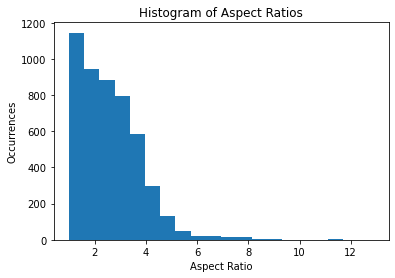

In [6]:
plt.hist(ratios, bins=20)
plt.xlabel('Aspect Ratio')
plt.ylabel('Occurrences')
plt.title('Histogram of Aspect Ratios')
plt.savefig('histogram.png')
print(np.median(ratios))

In [9]:
frame = frame.drop(1214)

KeyError: '[1214] not found in axis'

### Experiment 1

In [43]:
x = 100
y = 40
expansions = ['C5','SR71','Tu160','Tu95','U2','XB70','YF23']
new_path = r"/Users/vijay/Desktop/Fall2020/DIP/Project/cropped_images/"
images = glob.glob(new_path + '*.jpg')

new_df = pd.DataFrame()
X = []
labels = []
for i in range(len(images)):
    image = Image.open(images[i]).convert('RGB')
    #image = Image.new("RGBA", img.size)
    #image.paste(img)
    if(image.size[1] > image.size[0]):
        image = image.rotate(90, expand=True)
    ratio = image.size[0]/image.size[1]
    if ratio > 2.5:
        y_change = int(np.rint(x/ratio))
        #print('y_change ' + str(y_change))
        y_border = int(np.ceil((y - y_change)/2))
        #print('y_border ' + str(y_border))
        image = image.resize((x, y_change))
        if y_change%2 != 0:
            image = ImageOps.expand(image, (0,y_border-1,0,y_border))
        else:
            image = ImageOps.expand(image, (0,y_border,0,y_border))
    elif ratio < 2.5:
        x_change = int(np.rint(y*ratio))
        #print('x_change ' + str(x_change))
        x_border = int(np.ceil((x-x_change)/2))
        #print('x_border ' + str(x_border))
        image = image.resize((x_change,y))
        if x_change%2 != 0:
            image = ImageOps.expand(image, (x_border-1,0,x_border,0))
        else:
            image = ImageOps.expand(image, (x_border,0,x_border,0))
    else:
        image = image.resize((x,y))
    #print(image.size)
    #image.show()
    #new_image = ImageOps.grayscale(image)
    if(np.array(image).shape != (40,100,3)):
        print(images[i])
        #image.show()
    index = int(images[i].split('/')[8].split('.')[0])
    label = frame.loc[frame.index == index]
    #if(label['class'].values[0] != 'F15'):
    new_image_2 = image.transpose(Image.FLIP_LEFT_RIGHT)
    new_image_3 = image.transpose(Image.FLIP_TOP_BOTTOM)
    new_image_4 = image.transpose(Image.ROTATE_180)
    array_im = np.array(image)
    #print(array_im.shape)
    array_im_2 = np.array(new_image_2)
    array_im_3 = np.array(new_image_3)
    array_im_4 = np.array(new_image_4)
    X.append(array_im)
    X.append(array_im_2)
    X.append(array_im_3)
    X.append(array_im_4)
    #array_im = np.ravel(array_im)
    #array_series = pd.Series(array_im)
    #print(np.unique(array_im))
    #new_df = new_df.append(array_series, ignore_index=True)

    #print(label['class'].values[0])
    try:
        if label['class'].values[0] in expansions:
            new_image_5 = new_image_2.transpose(Image.FLIP_TOP_BOTTOM)
            array_im_5 = np.array(new_image_5)
            X.append(array_im_4)
            labels.append(label['class'].values[0])
            labels.append(label['class'].values[0])
            labels.append(label['class'].values[0])
            labels.append(label['class'].values[0])
            labels.append(label['class'].values[0])
        else:
            labels.append(label['class'].values[0])
            labels.append(label['class'].values[0])
            labels.append(label['class'].values[0])
            labels.append(label['class'].values[0])
    except IndexError:
        print(images[i])
    #else:
        #array_im = np.array(image)
        #new_image_2 = image.transpose(Image.FLIP_LEFT_RIGHT)
        #array_im_2 = np.array(new_image_2)
        #X.append(array_im)
        #X.append(array_im_2)
        #labels.append(label['class'].values[0])
        #labels.append(label['class'].values[0])
labels_series = pd.Series(labels)
new_df.head()
    

""


In [11]:
print(images[1])
im = Image.fromarray(X[4])
im.show()

/Users/vijay/Desktop/Fall2020/DIP/Project/cropped_images/4217.jpg


### Experiment 2

In [151]:
x = 300
y = 120

new_df_2 = pd.DataFrame()
X_2 = []
labels_2 = []
print(len(images))
for i in range(len(images)):
    image = Image.open(images[i])
    if(image.size[1] > image.size[0]):
        image = image.rotate(90, expand=True)
    #image.show()
    #print(image.size[0],image.size[1] )
    ratio = image.size[0]/image.size[1]
    if ratio > 2.5:
        y_change = int(np.rint(x/ratio))
        #print('y_change ' + str(y_change))
        y_border = int(np.ceil((y - y_change)/2))
        #print('y_border ' + str(y_border))
        image = image.resize((x, y_change))
        if y_change%2 != 0:
            image = ImageOps.expand(image, (0,y_border-1,0,y_border))
        else:
            image = ImageOps.expand(image, (0,y_border,0,y_border))
    elif ratio < 2.5:
        x_change = int(np.rint(y*ratio))
        #print('x_change ' + str(x_change))
        x_border = int(np.ceil((x-x_change)/2))
        #print('x_border ' + str(x_border))
        image = image.resize((x_change,y))
        if x_change%2 != 0:
            image = ImageOps.expand(image, (x_border-1,0,x_border,0))
        else:
            image = ImageOps.expand(image, (x_border,0,x_border,0))
    else:
        image = image.resize((x,y))
    #print(image.size)
    #image.show()
    new_image = ImageOps.grayscale(image)
    array_im = np.array(new_image)
    X_2.append(array_im)
    array_im = np.ravel(array_im)
    array_series = pd.Series(array_im)
    #print(np.unique(array_im))
    new_df_2 = new_df_2.append(array_series, ignore_index=True)
    index = int(images[i].split('/')[8].split('.')[0])
    label = frame.loc[frame.index == index]
    #print(label['class'].values[0])
    try:
        labels_2.append(label['class'].values[0])
    except IndexError:
        print(images[i])
labels_series_2 = pd.Series(labels_2)
new_df_2.head()
    

4912


,0,1,2,3,4,5,6,7,8,9,...,35990,35991,35992,35993,35994,35995,35996,35997,35998,35999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
for i in range(len(X)):
    if(X[i].shape != (40,100,3)):
        print(i)

In [35]:
Image.fromarray(X[16]).show()
Image.open(images[4]).show()

In [44]:
X = np.stack(X, axis=0)
X.shape

(20076, 40, 100, 3)

In [45]:
X.shape

(20076, 40, 100, 3)

In [46]:
cat_labels = pd.get_dummies(labels_series)
cat_labels

,A10,B1,B2,B52,C130,C17,C5,E2,EF2000,F117,...,RQ4,Rafale,SR71,Su57,Tu160,Tu95,U2,V22,XB70,YF23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20071,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20072,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 32 artists>

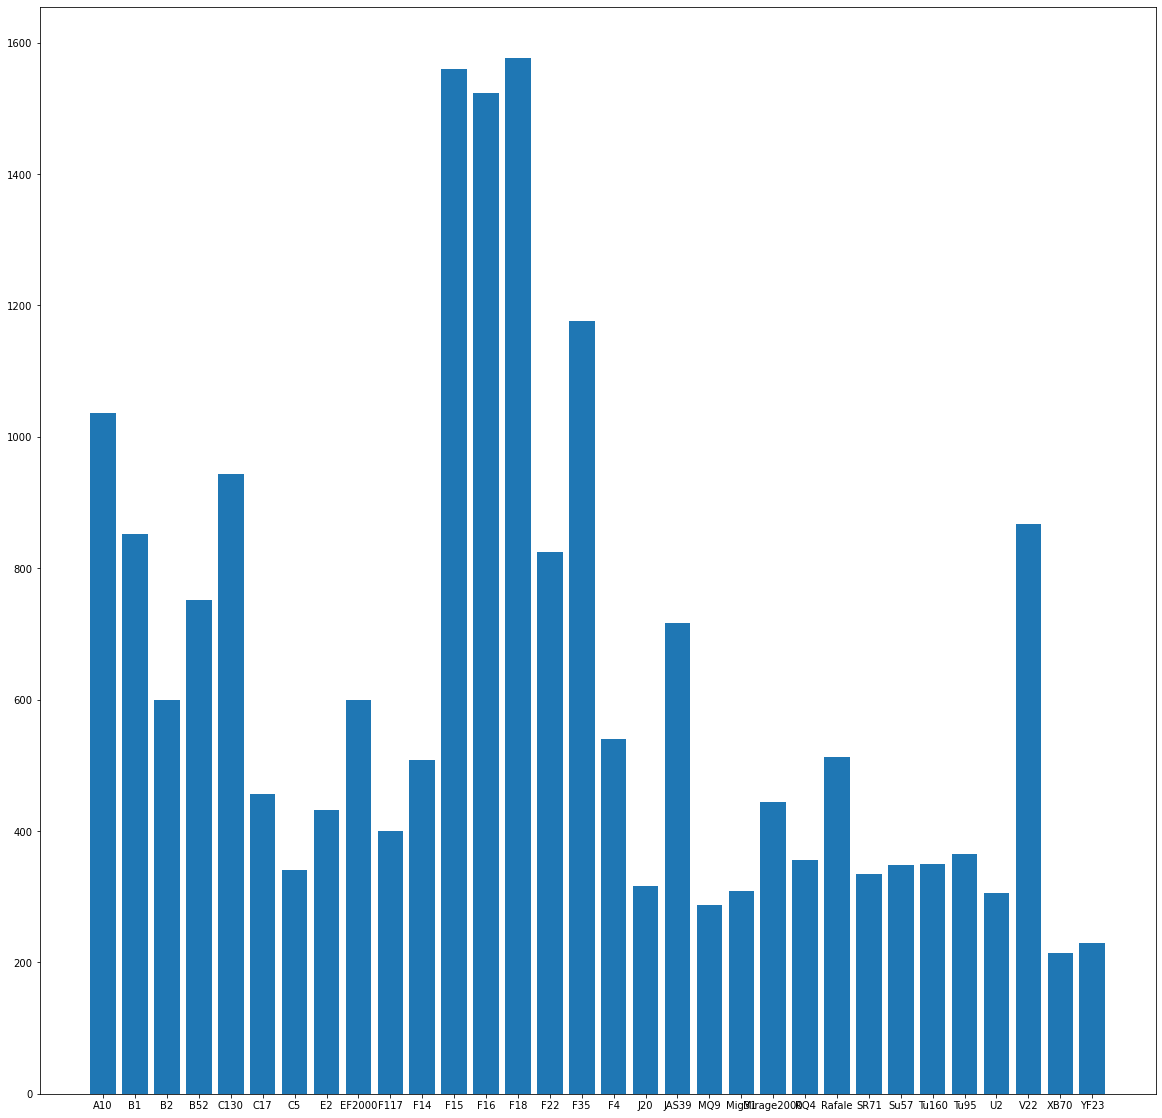

In [47]:
plt.figure(figsize=(20,20))
plt.bar(cat_labels.columns, cat_labels.sum(axis=0))

In [48]:
Y_numpy = cat_labels.to_numpy()
Y_numpy.shape

(20076, 32)

In [49]:
cat_labels.columns

Index(['A10', 'B1', 'B2', 'B52', 'C130', 'C17', 'C5', 'E2', 'EF2000', 'F117',
       'F14', 'F15', 'F16', 'F18', 'F22', 'F35', 'F4', 'J20', 'JAS39', 'MQ9',
       'Mig31', 'Mirage2000', 'RQ4', 'Rafale', 'SR71', 'Su57', 'Tu160', 'Tu95',
       'U2', 'V22', 'XB70', 'YF23'],
      dtype='object')

### Model 1

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
#import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import optimizers

In [52]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(100,40,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='softmax'))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 96, 36, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 18, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 8, 64)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 6, 64)         36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 3, 64)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 1, 64)         

In [54]:
X_reshape = X.reshape(-1,100,40,3)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X_reshape, Y_numpy, test_size=0.25)

In [56]:
optimizer = optimizers.Adam(lr=0.001)
model.compile(
    optimizer=optimizer, loss='CategoricalCrossentropy', metrics='accuracy'
)

In [64]:
model.fit(x=x_train,y=y_train,epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
471/471 [==============================] - 66s 140ms/step - loss: 1.2390 - accuracy: 0.6330 - val_loss: 3.4666 - val_accuracy: 0.3134
Epoch 2/10
471/471 [==============================] - 69s 147ms/step - loss: 1.1767 - accuracy: 0.6499 - val_loss: 3.7201 - val_accuracy: 0.3082
Epoch 3/10
471/471 [==============================] - 72s 152ms/step - loss: 1.2205 - accuracy: 0.6395 - val_loss: 3.6858 - val_accuracy: 0.3192
Epoch 4/10
471/471 [==============================] - 69s 146ms/step - loss: 1.1343 - accuracy: 0.6607 - val_loss: 3.7902 - val_accuracy: 0.3238
Epoch 5/10
471/471 [==============================] - 71s 150ms/step - loss: 1.0775 - accuracy: 0.6774 - val_loss: 3.8973 - val_accuracy: 0.3178
Epoch 6/10
471/471 [==============================] - 72s 153ms/step - loss: 1.0663 - accuracy: 0.6758 - val_loss: 3.9309 - val_accuracy: 0.3218
Epoch 7/10
471/471 [==============================] - 72s 153ms/step - loss: 1.0940 - accuracy: 0.6763 - val_loss: 4.2154 - val_ac

In [65]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [66]:
predictions = model.predict(x_test)
predictions = predictions.argmax(axis=1)
#predictions = predictions.reshape(-1,1)
#enc = OneHotEncoder()
#y_pred = enc.fit_transform(predictions)
#print(y_pred.shape)

#cm = multilabel_confusion_matrix(y_test, y_pred)
#sns.heatmap(cm)

y_test_int = [np.where(r==1)[0][0] for r in y_test]
cm = confusion_matrix(y_test_int, predictions)
print(cm)

[[103  13   1 ...   6   5   1]
 [ 14  70   5 ...   7   2   0]
 [  4   8  53 ...   1   2   5]
 ...
 [  4   9   3 ...  69   7   1]
 [  2   2   0 ...   2  22   0]
 [  4   3   2 ...   2   3  18]]


In [67]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('cov_mat.png')

### Confusion Matrix 1

Normalized confusion matrix
[[0.38289963 0.04832714 0.00371747 ... 0.02230483 0.01858736 0.00371747]
 [0.06451613 0.32258065 0.02304147 ... 0.03225806 0.00921659 0.        ]
 [0.02758621 0.05517241 0.36551724 ... 0.00689655 0.0137931  0.03448276]
 ...
 [0.01709402 0.03846154 0.01282051 ... 0.29487179 0.02991453 0.0042735 ]
 [0.04       0.04       0.         ... 0.04       0.44       0.        ]
 [0.06349206 0.04761905 0.03174603 ... 0.03174603 0.04761905 0.28571429]]


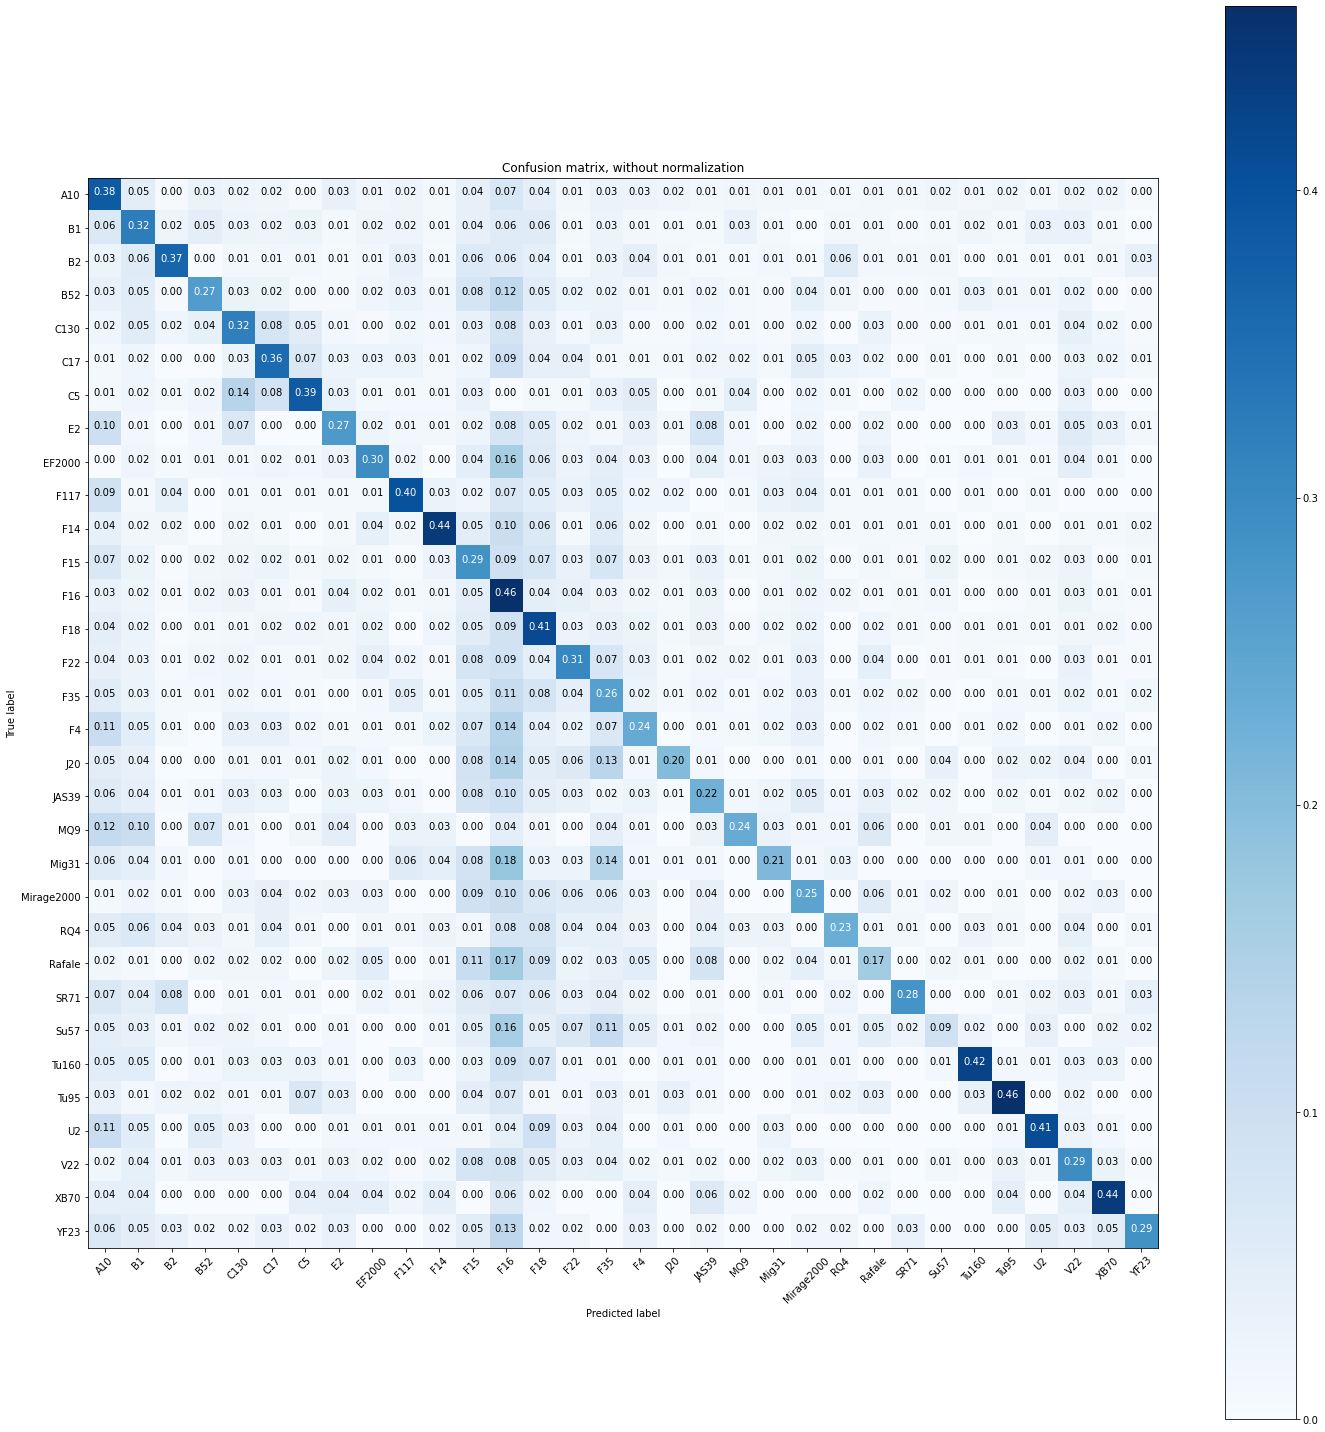

In [69]:
plot_confusion_matrix(cm, classes=cat_labels.columns,
                      title='Confusion matrix, without normalization')

### Model 2

In [152]:
len(new_df_2)

4912

In [155]:
X_2 = np.array(X_2)
cat_labels = pd.get_dummies(labels_series)
Y_numpy_2 = cat_labels.to_numpy()
print(X_2.shape)

(4912, 120, 300)


In [163]:
model = models.Sequential()
model.add(layers.Conv2D(32, (10, 10), activation='relu', input_shape=(300,120,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='softmax'))

X_reshape_2 = X_2.reshape(-1,300,120,1)
x_train, x_test, y_train, y_test = train_test_split(X_reshape_2, Y_numpy_2, test_size=0.25)

In [164]:
optimizer = optimizers.Adam(lr=0.001)
model.compile(
    optimizer=optimizer, loss='CategoricalCrossentropy', metrics='accuracy'
)
model.fit(x=x_train,y=y_train,epochs=50, validation_data=(x_test,y_test))

Epoch 1/50
116/116 [==============================] - 150s 1s/step - loss: 10.3346 - accuracy: 0.0630 - val_loss: 3.3610 - val_accuracy: 0.0879
Epoch 2/50
116/116 [==============================] - 150s 1s/step - loss: 3.3406 - accuracy: 0.1001 - val_loss: 3.3101 - val_accuracy: 0.0912
Epoch 3/50
116/116 [==============================] - 149s 1s/step - loss: 3.2768 - accuracy: 0.1148 - val_loss: 3.2401 - val_accuracy: 0.0920
Epoch 4/50
116/116 [==============================] - 149s 1s/step - loss: 3.2004 - accuracy: 0.1203 - val_loss: 3.1919 - val_accuracy: 0.1107
Epoch 5/50
116/116 [==============================] - 149s 1s/step - loss: 3.1421 - accuracy: 0.1172 - val_loss: 3.1772 - val_accuracy: 0.1099
Epoch 6/50
116/116 [==============================] - 148s 1s/step - loss: 3.1212 - accuracy: 0.1162 - val_loss: 3.1836 - val_accuracy: 0.1091
Epoch 7/50
116/116 [==============================] - 149s 1s/step - loss: 3.1037 - accuracy: 0.1221 - val_loss: 3.1583 - val_accuracy: 0.115

KeyboardInterrupt: 